# Crear una onda sinusoidal con amplitud A, período $\omega_0$  y $\phi_0$

La ecuacion de una señal sinusoidal es:
$$
y(t) = A \sin(\omega_0 t + \phi_0)
$$

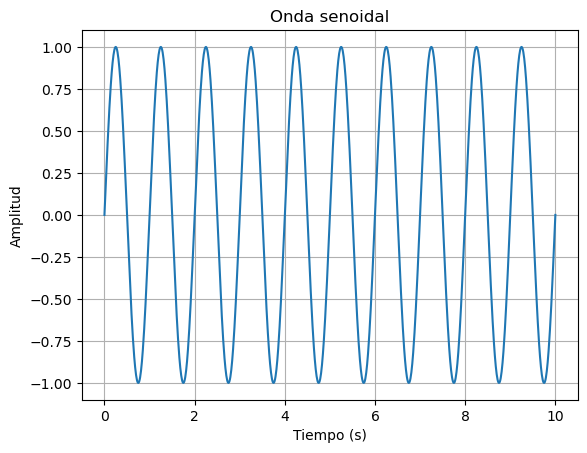

In [1]:
# crea una funcion senoidal y grafica su forma de onda
import numpy as np
import matplotlib.pyplot as plt

def sine_wave(A, omega_0, phi_0, t):
    """
    Crea una onda sinusoidal con amplitud A, período omega_0 y fase phi_0.
    """
    return A * np.sin(omega_0 * t + phi_0)
# Parámetros de la onda
A = 1  # Amplitud
omega_0 = 2 * np.pi  # Frecuencia angular (1 Hz)
phi_0 = 0  # Fase (en radianes)
# Tiempo de muestreo
t = np.linspace(0, 10, 1000)
# Generar la onda
y = sine_wave(A, omega_0, phi_0, t)
plt.plot(t, y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Onda senoidal')
plt.grid()

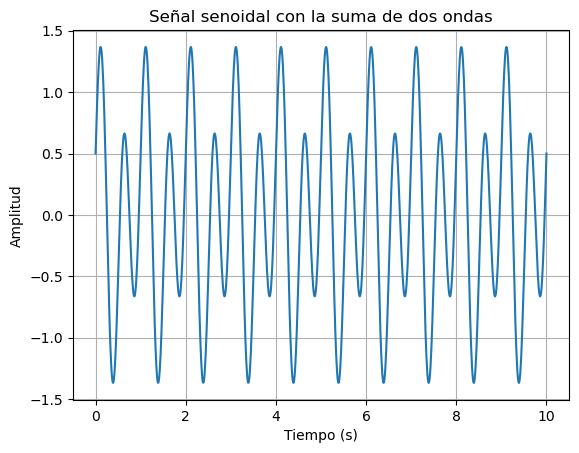

In [2]:
# Crea una señal senoidal con la suma de dos ondas senoidales
def sine_wave_sum(A1, omega_1, phi_1, A2, omega_2, phi_2, t):
    """    Crea una señal senoidal que es la suma de dos ondas senoidales.
    """
    return sine_wave(A1, omega_1, phi_1, t) + sine_wave(A2, omega_2, phi_2, t)
# Parámetros de las ondas
A1 = 1.0  # Amplitud de la primera onda
omega_1 = 2 * np.pi * 2.0  # Frecuencia angular (1 Hz)
phi_1 = 2 * np.pi * 5.0  # Fase de la primera onda
A2 = 0.5  # Amplitud de la segunda onda
omega_2 = 2 * np.pi  # Frecuencia angular de la segunda onda
phi_2 = np.pi/2  # Fase de la segunda onda
# Genera una señal senoidal con la suma de las dos ondas
y_sum = sine_wave_sum(A1, omega_1, phi_1, A2, omega_2, phi_2, t)
plt.figure()
plt.plot(t, y_sum)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal senoidal con la suma de dos ondas')
plt.grid()

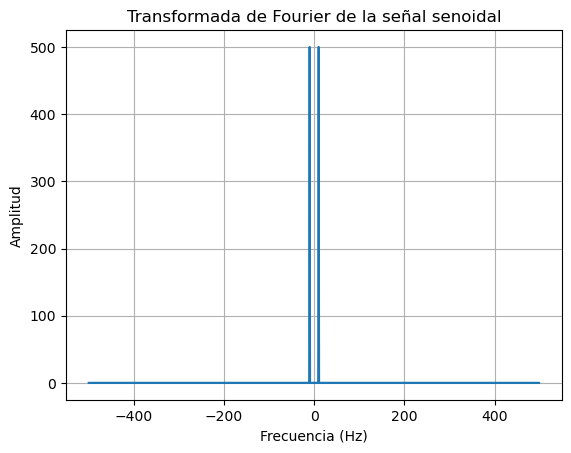

In [3]:
# Obten la transformada de Fourier de la señal senoidal 
def fourier_transform(signal, t):
    """
    Calcula la transformada de Fourier de una señal.
    """
    N = len(signal)
    dt = t[1] - t[0]
    f = np.fft.fftfreq(N, d=dt)
    F_signal = np.fft.fft(signal)
    return f, F_signal
# generar la señal senoidal
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2 * np.pi * 10 * t)

# Obten la transformada de Fourier de la señal senoidal
f, F_signal = fourier_transform(signal, t)
plt.figure()
plt.plot(f, np.abs(F_signal))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier de la señal senoidal')
plt.grid()

## Ejemplo completo

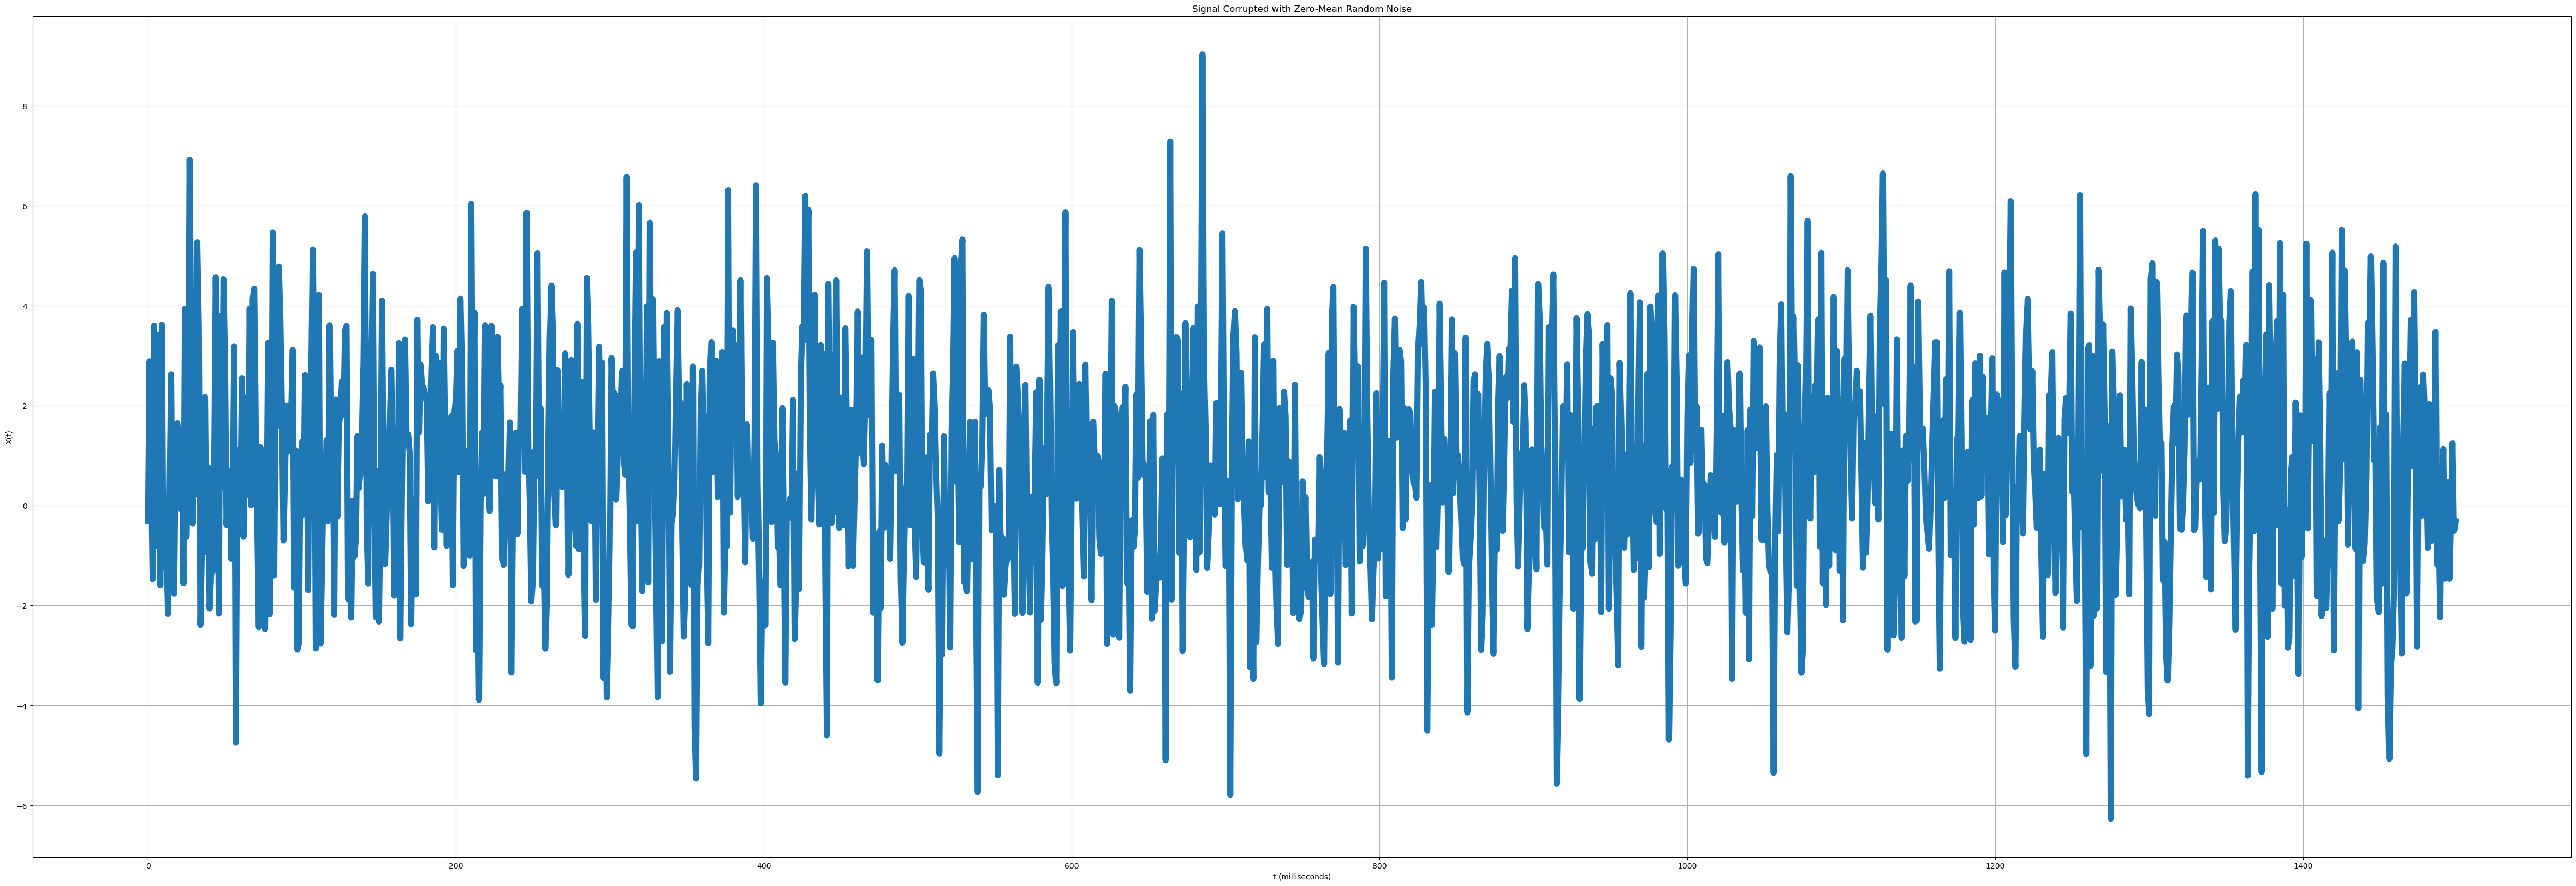

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
Fs = 1000            # Frecuencia de muestreo
T = 1/Fs             # Período de muestreo
L = 1500             # Longitud de la señal
t = np.arange(0, L) * T  # Vector de tiempo

# Generar la señal original
S = 0.8 + 0.7*np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

# Añadir ruido gaussiano
X = S + 2*np.random.randn(len(t))

# Gráfica 1: Señal corrompida con ruido
plt.figure(figsize = (60, 20))
plt.plot(1000*t, X, linewidth = 8)
plt.title("Signal Corrupted with Zero-Mean Random Noise")
plt.xlabel("t (milliseconds)")
plt.ylabel("X(t)")
plt.grid(True)

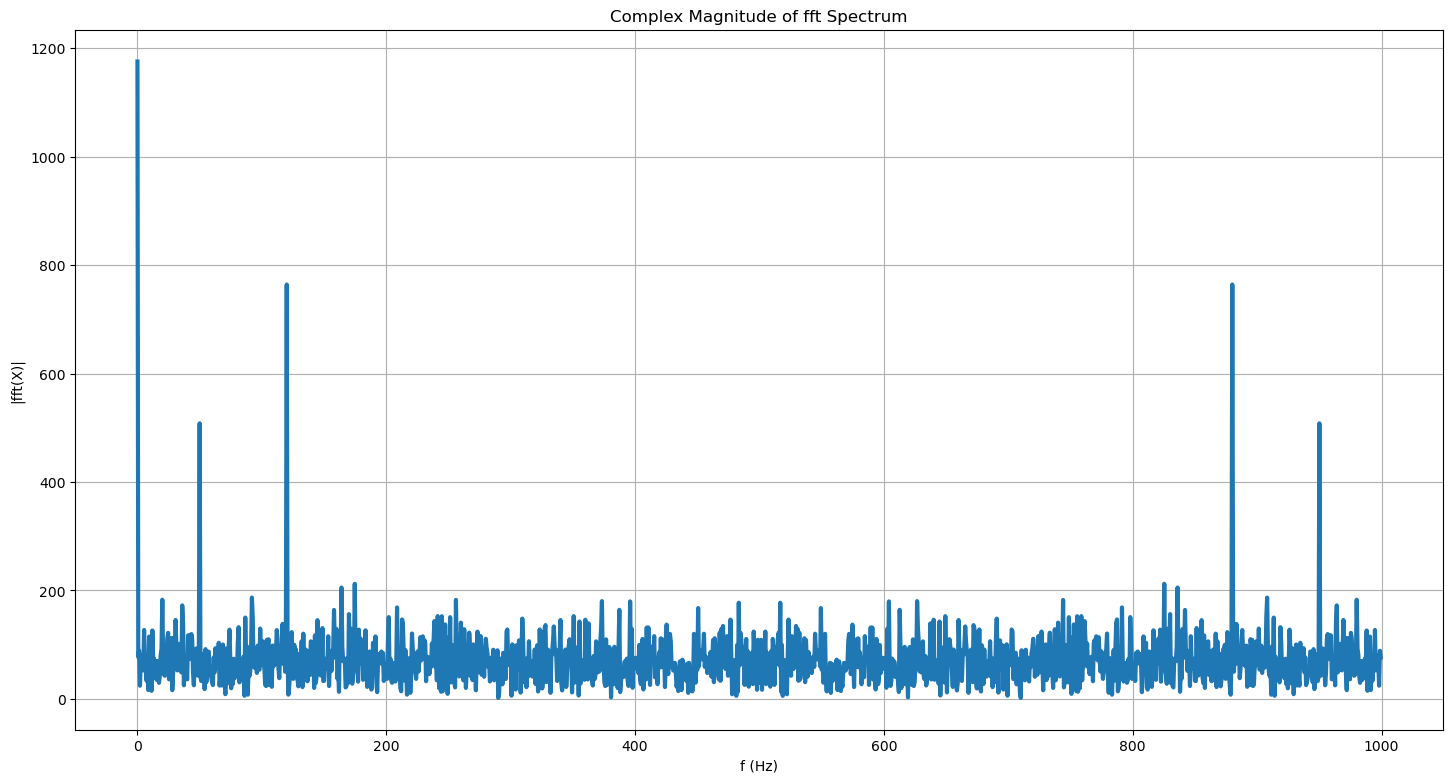

In [ ]:
# FFT de la señal con ruido
Y = np.fft.fft(X)

# Gráfica 2: Magnitud compleja del espectro FFT
plt.figure(figsize = (60, 20))
f_axis = Fs/L * np.arange(0, L)
plt.plot(f_axis, np.abs(Y), linewidth=3)
plt.title("Complex Magnitude of fft Spectrum")
plt.xlabel("f (Hz)")
plt.ylabel("|fft(X)|")
plt.grid(True)

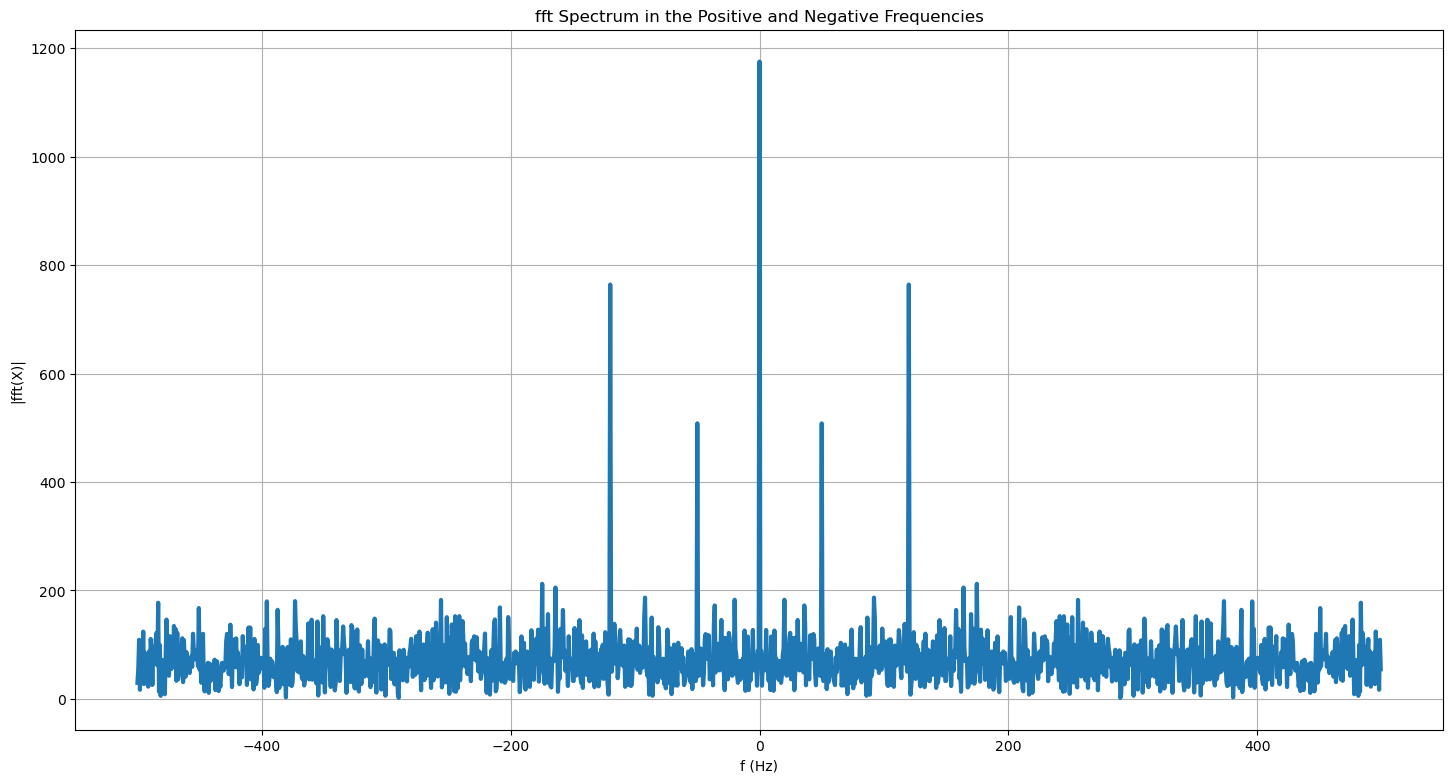

In [ ]:
# Gráfica 3: Espectro FFT en frecuencias positivas y negativas
plt.figure(figsize = (60, 20))
f_axis_shifted = Fs/L * np.arange(-L//2, L//2)
Y_shifted = np.fft.fftshift(Y)
plt.plot(f_axis_shifted, np.abs(Y_shifted), linewidth=3)
plt.title("fft Spectrum in the Positive and Negative Frequencies")
plt.xlabel("f (Hz)")
plt.ylabel("|fft(X)|")
plt.grid(True)

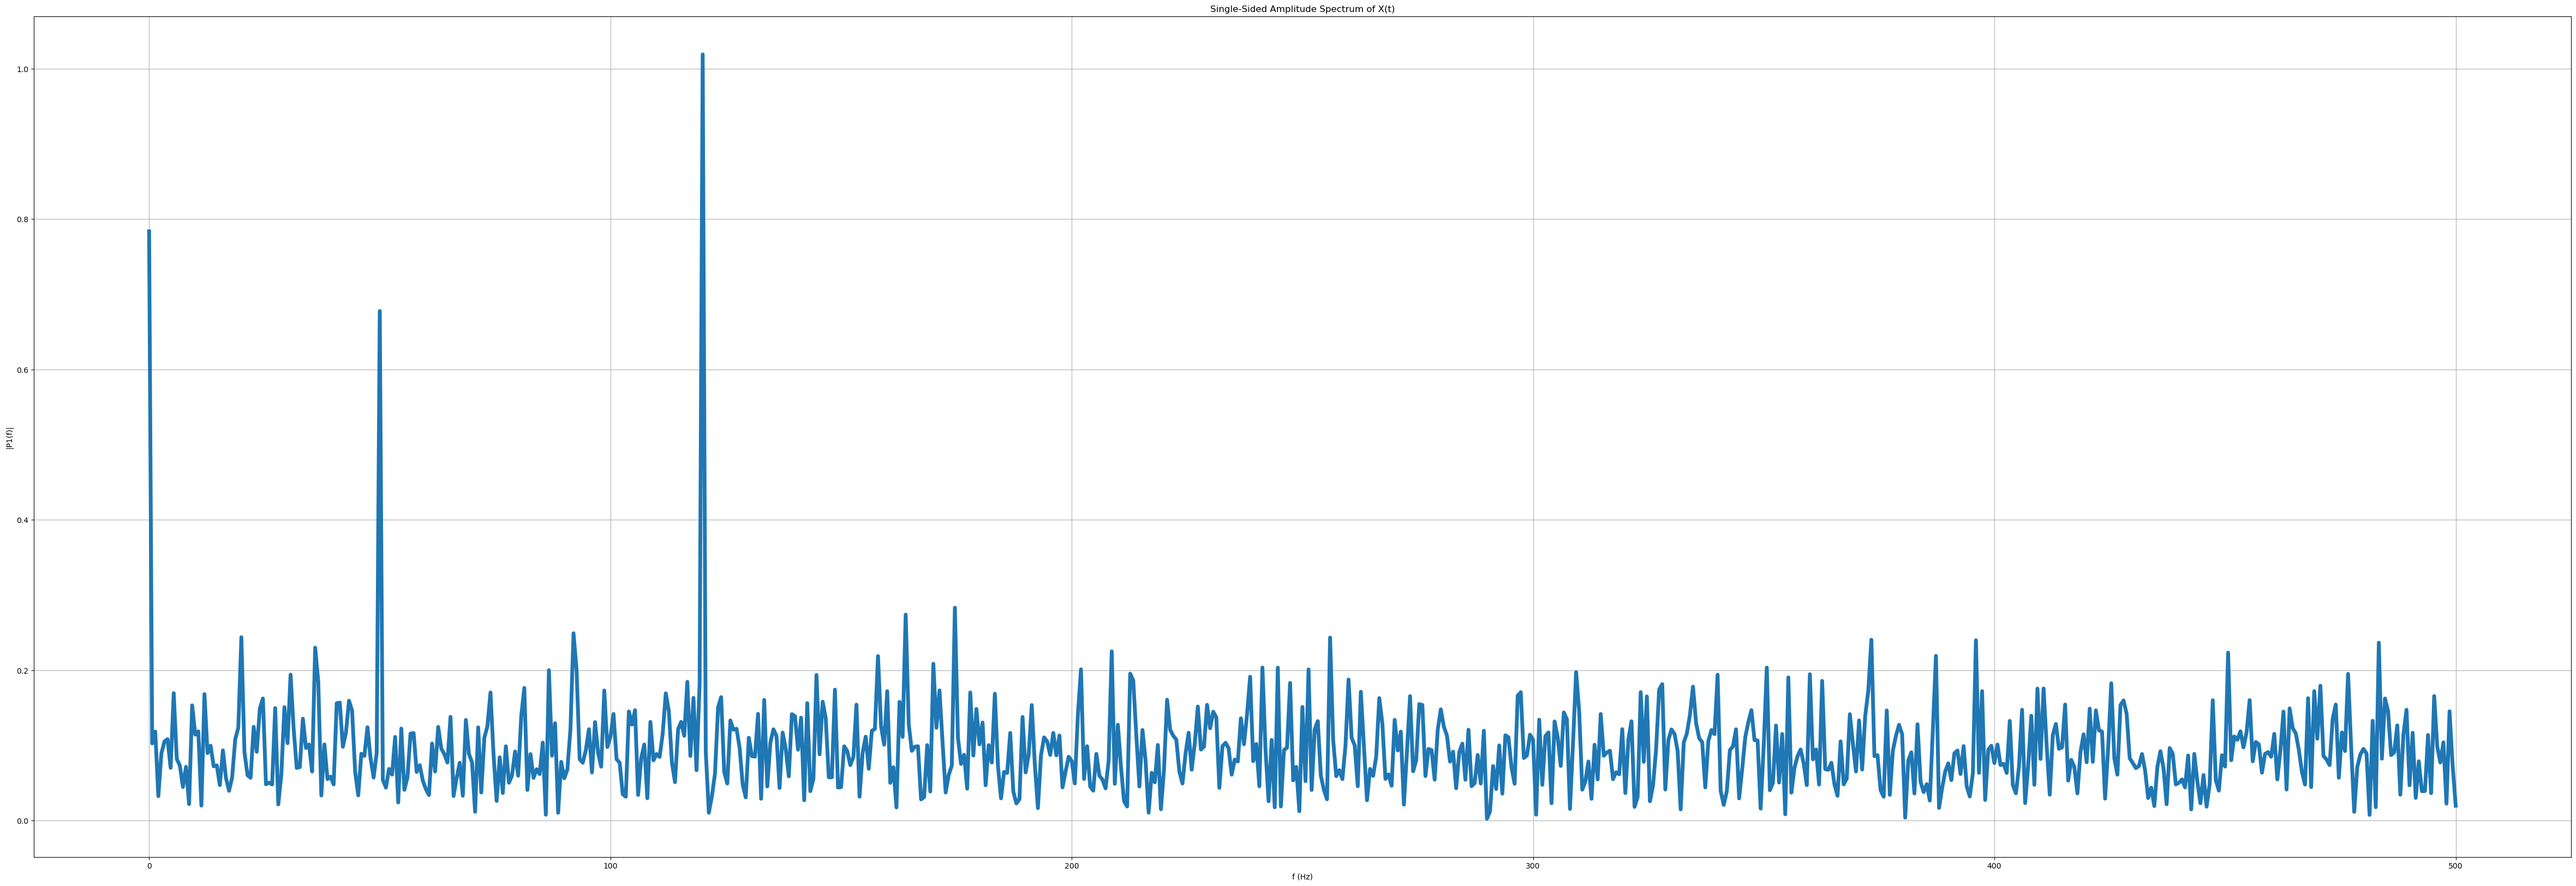

In [17]:
# Gráfica 4: Espectro de amplitud de un solo lado de X(t)
plt.figure(figsize = (60, 20))
P2 = np.abs(Y/L)
P1 = P2[0:L//2+1].copy()
P1[1:-1] = 2*P1[1:-1]  # Multiplicar por 2 excepto DC y Nyquist
f = Fs/L * np.arange(0, L//2+1)
plt.plot(f, P1, linewidth = 5)
plt.title("Single-Sided Amplitude Spectrum of X(t)")
plt.xlabel("f (Hz)")
plt.ylabel("|P1(f)|")
plt.grid(True)

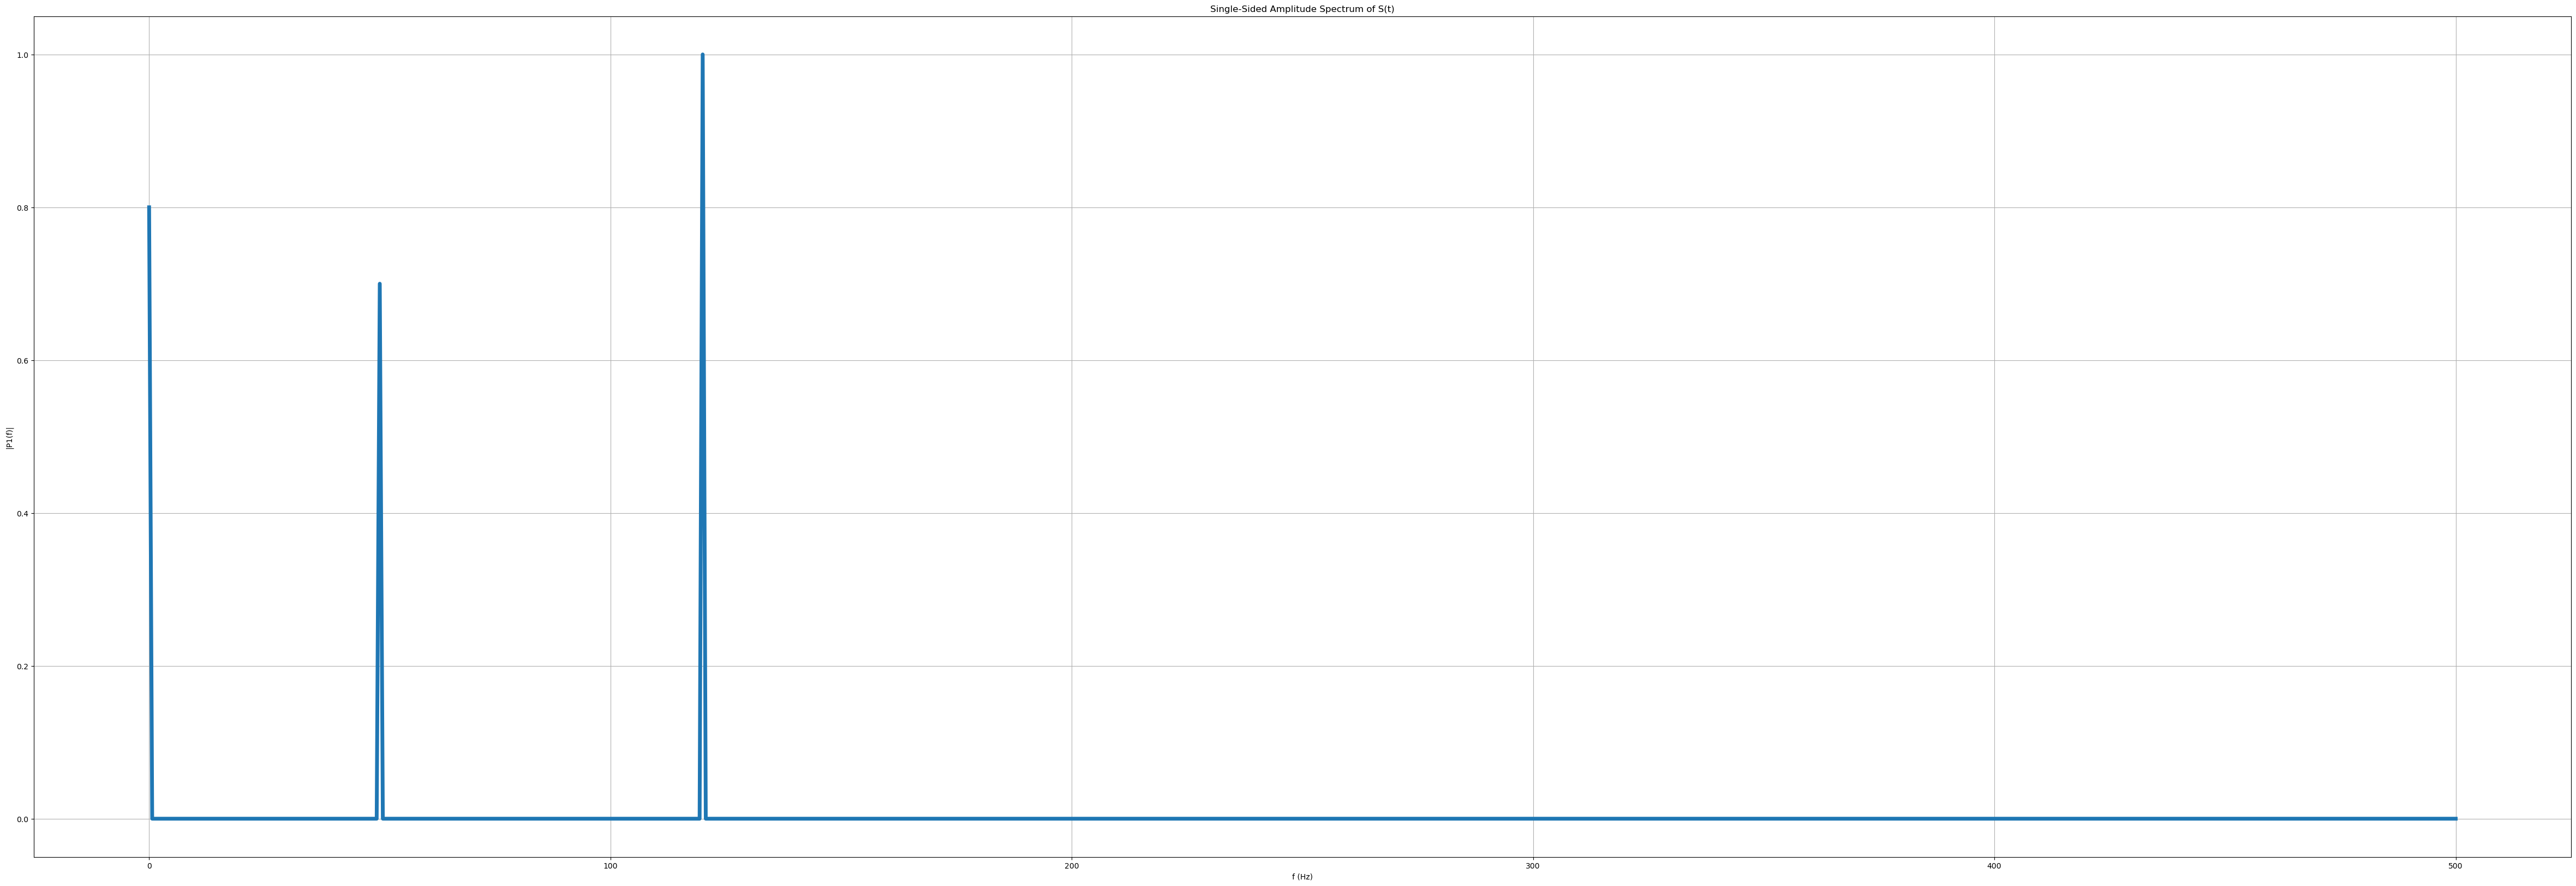

In [18]:
# Gráfica 5: Espectro de amplitud de un solo lado de S(t) (señal sin ruido)
plt.figure(figsize = (60, 20))
Y_clean = np.fft.fft(S)
P2_clean = np.abs(Y_clean/L)
P1_clean = P2_clean[0:L//2+1].copy()
P1_clean[1:-1] = 2*P1_clean[1:-1]
plt.plot(f, P1_clean, linewidth = 5)
plt.title("Single-Sided Amplitude Spectrum of S(t)")
plt.xlabel("f (Hz)")
plt.ylabel("|P1(f)|")
plt.grid(True)

In [9]:
# Información adicional
print(f"Frecuencia de muestreo: {Fs} Hz")
print(f"Período de muestreo: {T} s")
print(f"Longitud de la señal: {L} muestras")
print(f"Duración total: {L*T} s")
print(f"Resolución en frecuencia: {Fs/L} Hz")

Frecuencia de muestreo: 1000 Hz
Período de muestreo: 0.001 s
Longitud de la señal: 1500 muestras
Duración total: 1.5 s
Resolución en frecuencia: 0.6666666666666666 Hz
